### Synthetic data

The following blocks of code will generate synthetic documents belonging to a given topic across 100 time stamps. A total of five topics will be used to create the data. Firstly the probability of each topic for each timestamp is generated. The probabilities have to sum to 1 so it corresponds to all topics discussed. For the first time stamp a non-uniform dirichlet is used as this ensures that the probabilities sum top 1. When propegating forward in time autocorrelation is desired as this would be expected in the real parliment. Therefore a new probability for a given topic is drawn from a normal distribution with mean equaling the previous probability. Due to the stochastic element of the normal distribution some new probabilities can end up negative which is problematic. Therefore, if any probabilities are negative a random constant (based on a uniform distribution) is added to make all numbers positive. Lastly the data is normalized for each time stamp so the numbers corresponds to probabilities. Below the cell a plot of the probabilities over time can be seen.

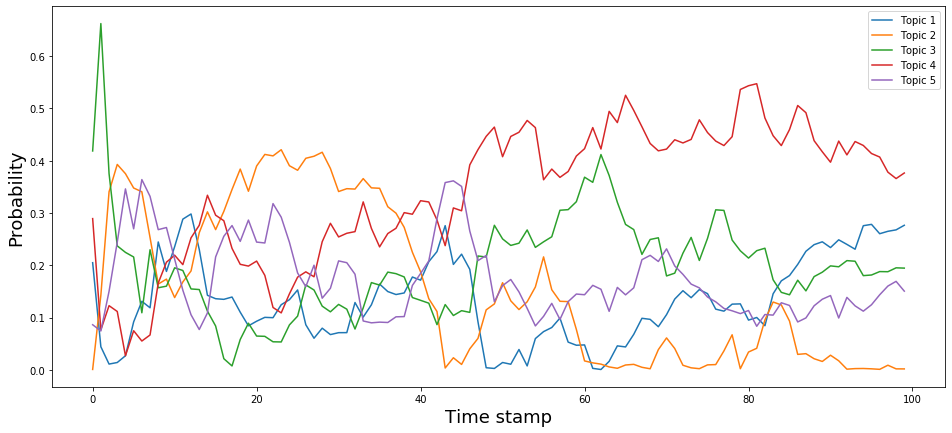

In [229]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt

# Set seed
np.random.seed(123)

# Set number of topics, words per topic and time points
topics = 5
word_topic = 25
T = 100

# Initialize time series and first time step using dirichlet
time_series = np.zeros((T,topics))
time_series[0,:] = np.random.dirichlet(np.array([0.2,0.2,0.3,0.5,0.4]))

# Fill remaining time points
for i in range(1,T):
    
    # Use previous time stamp to create new one
    tmp = np.random.normal(loc = time_series[i-1,:], scale=1)
    
    # Make sure no negative values
    if tmp.min() < 0:
        tmp+= np.random.uniform(-1.2*tmp.min(),-1.5*tmp.min())
        
    # Append new time stamp
    time_series[i,:] = tmp

# Normalizae time series
time_series = time_series / time_series.sum(axis=1).reshape(-1,1)

# Visualize the time series
plt.figure(figsize = (16,7))
plt.plot(time_series)
plt.xlabel("Time stamp", fontsize = 18)
plt.ylabel("Probability", fontsize = 18)
plt.legend(('Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5'))
plt.show()

Now we need to have a list of words and corresponds probabilties for it beloing to each topic. 25 words *fits* each topic for a total of 125 words. For each word the probability for it corresponds to its main topic is drawn from a uniform distribution with a lower bound of 0.7 and upper bound of 0.3. The remaining probabilities for the other topics are drawn from a sparse dirichlet, which is normalised so the sum of probabilities for each word sum up to 1.

In [216]:
# Initialize matrix
word_prob = np.zeros((word_topic*topics,5))

# Fill out probabilities of main words
for i in range(topics):
    word_prob[i*word_topic:(i+1)*word_topic,i] = np.random.uniform(0.7,0.9,word_topic)
    
    
# Fill the remaining 
for i in range(word_topic*topics):
    if i < word_topic:
        diff = (1-word_prob[0:word_topic, 0]).reshape(-1,1)
        fill = np.random.dirichlet(np.array([0.3, 0.3, 0.3, 0.3]), size = word_topic) * diff
        
        word_prob[0:word_topic, 1] = fill[:, 0]
        word_prob[0:word_topic, 2] = fill[:, 1]
        word_prob[0:word_topic, 3] = fill[:, 2]
        word_prob[0:word_topic, 4] = fill[:, 3]
    
    elif i < 2*word_topic:
        diff = (1-word_prob[word_topic:2*word_topic, 1]).reshape(-1,1)
        fill = np.random.dirichlet(np.array(0.3, 0.3, 0.3, 0.3), size = word_topic) * diff
        
        word_prob[word_topic:2*word_topic, 0] = fill[:, 0]
        word_prob[word_topic:2*word_topic, 2] = fill[:, 1]
        word_prob[word_topic:2*word_topic, 3] = fill[:, 2]
        word_prob[word_topic:2*word_topic, 4] = fill[:, 3]
        
    elif i < 3*word_topic:
        diff = (1-word_prob[2*word_topic:3*word_topic, 2]).reshape(-1,1)
        fill = np.random.dirichlet(np.array(0.3, 0.3, 0.3, 0.3), size = word_topic) * diff
        
        word_prob[2*word_topic:3*word_topic, 0] = fill[:, 0]
        word_prob[2*word_topic:3*word_topic, 1] = fill[:, 1]
        word_prob[2*word_topic:3*word_topic, 3] = fill[:, 2]
        word_prob[2*word_topic:3*word_topic, 4] = fill[:, 3]
        
    elif i < 80:
        diff = (1-word_prob[3*word_topic:4*word_topic, 3]).reshape(-1,1)
        fill = np.random.dirichlet(np.array(0.3, 0.3, 0.3, 0.3), size = word_topic) * diff
        
        word_prob[3*word_topic:4*word_topic, 0] = fill[:, 0]
        word_prob[3*word_topic:4*word_topic, 1] = fill[:, 1]
        word_prob[3*word_topic:4*word_topic, 2] = fill[:, 2]
        word_prob[3*word_topic:4*word_topic, 4] = fill[:, 3]
        
    else:
        diff = (1-word_prob[4*word_topic:5*word_topic, 4]).reshape(-1,1)
        fill = np.random.dirichlet(np.array(0.3, 0.3, 0.3, 0.3), size = word_topic) * diff
        
        word_prob[4*word_topic:5*word_topic, 0] = fill[:, 0]
        word_prob[4*word_topic:5*word_topic, 1] = fill[:, 1]
        word_prob[4*word_topic:5*word_topic, 2] = fill[:, 2]
        word_prob[4*word_topic:5*word_topic, 3] = fill[:, 3]
        

print("We are sorry about this horific for loop")

We are sorry about this horific for loop


(2500, 10)

Now the documents much be generated and filled. For all time stamps 25 documents are created with a topic. The probaiblity of a document belonging to a given topic is given by the probabilties seen in the time series above. This gives in total 2500 documents. The documents are then filled with 50 words each where the probability of each word being drawn comes form the word/to

In [230]:
# Generating 25 documents per time stamp
docs_time = np.asarray([np.random.choice(a = [0,1,2,3,4], p = ts, size = 25) for ts in time_series]).ravel()

# Fill the documents with 30 words in each
words = np.asarray([np.random.choice(a = np.arange(word_topic*topics), p = word_prob[:,doc]/np.sum(word_prob[:,doc]), 
                                     size = 50) for doc in docs_time])

words.shape

(2500, 50)

The data is now saved so all uses the same synthetic data.

In [185]:
np.save("fakedata.npy", words)